그러나 너희는 택하신 족속이요 왕 같은 제사장들이요 거룩한 나라요 그의 소유가 된 백성이니 이는 너희를 어두운 데서 불러 내어 그의 기이한 빛에 들어가게 하신 이의 아름다운 덕을 선포하게 하려 하심이라 (벧전2:9)

-------

# Welcome to "AI for All" Final Exam (2020-2)

Lecture Notes by idebtor@gmail.com, Handong Global University

# 4.4 선형 회귀를 위한 뉴론 만들기

## Exercise - Final Exam (3 Problems)

### 에폭$^{epoch}$에 따른 오차제곱합 SSE 의 변화를 관찰하기

앞에서 구현한 클래스 Neuron에  오차제곱합 SSE(Sum of Squared Error)를 추적할 수 있도록 인터턴스 변수를 추가하고 당뇨병 자료로 에폭에 따른 오차제곱합 SSE의 변화를 시각화 하십시오. 

- 오차제곱합 인스턴스 변수 sse는 `__init__` 메소드에 추가하고 초기화하는 것보다 fit() 메소드가 낫습니다. 왜냐하면, sse 배열의 크기는 epoch에 따라 결정되기 때문입니다. 

#### Solution Part 1:   오차제곱합 sse 인스턴스 변수와 sse 계산하기

In [1]:
import numpy as np
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0

    def forpass(self, x):  
        y_hat = x * self.w + self.b 
        return y_hat

    def backprop(self, x, error): 
        w_grad = x * error
        b_grad = 1 * error
        return w_grad, b_grad

    def fit(self, x, y, epochs = 100): 
        self.sse = np.zeros((epochs))                      # initialize sse array as 0
        
        for i in range(epochs):                            # epoch만큼 반복합니다.
            sse_i = 0
            for x_i, y_i in zip(x, y):                     # 모든 샘플에 대해 반복합니다.
                y_hat = self.forpass(x_i)                   # 순전파 계산
                error = (y_i - y_hat)                       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, error)  # 역방향 계산
                self.w += w_grad                            # 가중치 조정
                self.b += b_grad                            # 편향 조정
                sse_i += (error * error)
            self.sse[i] = sse_i

#### Solution Part 2: 학습과 모델 결과 출력하기

- Diabetes 자료를 가져오기
- Neuron클래스 객체인 neuron을 생성하기 
- neuron객체의 fit() 메소드로 모델 생성하기
- neuron.sse로 평균제곱오차(mse) 계산하기
- 모델의 w와 b, 또한 mse를 출력하여 예전의 답과 같은지 확인하기

```
Weight: 913.5656499923714
  Bias: 123.39181064719298
   MSE: [9005.36195584 7469.28242258 7259.87058017 7227.18887467 7220.915469
 7219.36559842 7218.89987889 7218.74451808 7218.69033115 7218.67110647]
 ```

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

x = diabetes.data[:, 2]           # bmi feature 읽어오기 
y = diabetes.target               # target/label 읽어오기

neuron = Neuron()                 # create a neuron
neuron.fit(x, y, epochs=10)                 # training with epochs = 10 
mse = (neuron.sse / len(x))                 # get mse from sse
print("Weight:", neuron.w)
print("  Bias:", neuron.b)
print("   MSE:", mse)

Weight: 913.5656499923714
  Bias: 123.39181064719298
   MSE: [9005.36195584 7469.28242258 7259.87058017 7227.18887467 7220.915469
 7219.36559842 7218.89987889 7218.74451808 7218.69033115 7218.67110647]


#### Solution Part 3: MSE (평균 제곱 오차) 시각화 하기

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-diabetes11.png?raw=true" width="400">
<center>그림 2: 경사하강법 오차(MSE)의 변화 </center>


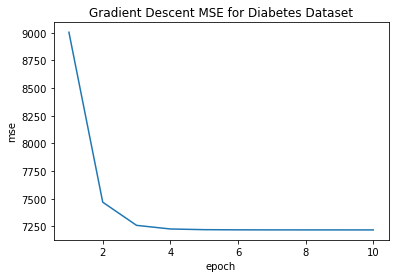

In [3]:
import matplotlib.pyplot as plt

plt.plot(np.array(range(1,11)), mse)            
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('Gradient Descent MSE for Diabetes Dataset')
plt.show()

# 제 1 강 신경망을 내 손으로 만져보기(Gate)

## Exercise - Final Exam (4 Problems)

#### AND, NAND, OR, NOR 게이트 로직을 다룰 수 있는 Gate라는 클래스를 만들고 출력을 확인하십시오. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/truthtable.png?raw=true" width="400">
<center>그림 1:  OR, AND, NAND, XOR 진리표 </center>

#### Part 1:  Gate 클래스 정의하기 (sse 인스턴스 변수와 코드 포함)

#### Solution:

In [4]:
import numpy as np

class Gate:
    def __init__(self):
        self.w = np.array([1.0, 1.0])         
        self.b = np.array([1.0]) 
        self.eta = 0.1

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        a = self.activation(z)
        return a

    def backprop(self, x, error): 
        w_grad = self.eta * x * error
        b_grad = self.eta * 1 * error
        return w_grad, b_grad
    
    def activation(self, z): 
        a = 1/(1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs = 1000):                    # default epochs = 1000
        self.sse = np.zeros((epochs)) 
        
        for i in range(epochs):                            # epoch만큼 반복합니다. 
            sse_i = 0
            for j in range(len(x)):                     # 모든 샘플에 대해 반복합니다.
                a = self.forpass(x[j])                   # 순전파 계산
                error = (y[j] - a)                       # 오차 계산
                w_grad, b_grad = self.backprop(x[j], error)  # 역방향 계산
                self.w += w_grad                            # 가중치 조정
                self.b += b_grad                            # 편향 조정
                sse_i += (error * error)
            self.sse[i] = sse_i

#### 입력 x와 y_and, y_nand, y_or, y_xor 레이블(타깃)을 정의하기 

In [5]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
y_and  = np.array([[0], [0], [0], [1]])
y_nand = np.array([[1], [1], [1], [0]])
y_or   = np.array([[0], [1], [1], [1]])
y_nor  = np.array([[1], [0], [0], [0]])

#### Part 2: gate_and 객체와 훈련하기  (epochs = 500)

- gate_and 객체를 생성하기
- 훈련하기
- mse 구하기 
- 모델의 결과와 예측을 출력하기 

```
AND Gate
Weight: [4.31247748 4.30140545]
  Bias: [-6.6310874]
[0 0] [0] y_hat:[0.00131699]
[0 1] [0] y_hat:[0.08869437]
[1 0] [0] y_hat:[0.08959338]
[1 1] [1] y_hat:[0.87897885]
```

#### Solution:

In [6]:
gate_and  = Gate()
gate_and.fit(x, y_and, epochs= 500)
mse = (gate_and.sse / len(x))         # get mse from sse

print("AND Gate")
print("Weight:", gate_and.w)
print("  Bias:", gate_and.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_and[i], 
                                  gate_and.activation(np.sum(x[i] * gate_and.w) + gate_and.b)))

AND Gate
Weight: [4.31247748 4.30140545]
  Bias: [-6.6310874]
[0 0] [0] y_hat:[0.00131699]
[0 1] [0] y_hat:[0.08869437]
[1 0] [0] y_hat:[0.08959338]
[1 1] [1] y_hat:[0.87897885]


#### Part 3: epoch에 따른 mse 시각화 하기

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-gate-mse.png?raw=true" width="400">
<center>그림 4: Gradient Descent MSE for Logic Gate</center>

#### Solution:

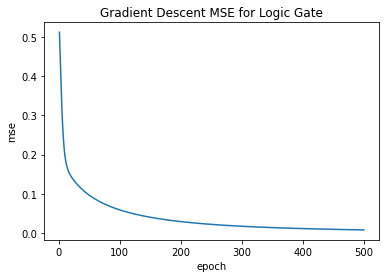

In [7]:
import matplotlib.pyplot as plt

plt.plot(np.array(range(1,501)), mse)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('Gradient Descent MSE for Logic Gate')
plt.show()

#### Part 4: NAND Gate

- gate_nand 객체를 생성하기
- 훈련하기
- mse 구하기 
- 모델의 결과와 예측을 출력하기 

```
NAND Gate
Weight: [-4.25914936 -4.24781832]
  Bias: [6.55111244]
[0 0] [1] y_hat:[0.99857351]
[0 1] [1] y_hat:[0.90914949]
[1 0] [1] y_hat:[0.90820923]
[1 1] [0] y_hat:[0.12391631]
```

#### Solution:

In [8]:
gate_nand  = Gate()
gate_nand.fit(x, y_nand, epochs= 500)
mse = (gate_nand.sse / len(x))         # get mse from sse

print("NAND Gate")
print("Weight:", gate_nand.w)
print("  Bias:", gate_nand.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_nand[i], 
                                  gate_nand.activation(np.sum(x[i] * gate_nand.w) + gate_nand.b)))

NAND Gate
Weight: [-4.25914936 -4.24781832]
  Bias: [6.55111244]
[0 0] [1] y_hat:[0.99857351]
[0 1] [1] y_hat:[0.90914949]
[1 0] [1] y_hat:[0.90820923]
[1 1] [0] y_hat:[0.12391631]


#### Part 4: OR Gate

- gate_or 객체를 생성하기
- 훈련하기
- mse 오차 구하기 
- 모델의 결과와 예측을 출력하기 

```
OR Gate
Weight: [5.42570445 5.43193129]
  Bias: [-2.21461759]
[0 0] [0] y_hat:[0.09844548]
[0 1] [1] y_hat:[0.96148065]
[1 0] [1] y_hat:[0.96124937]
[1 1] [1] y_hat:[0.99982368]
```
#### Solution:

In [9]:
gate_or  = Gate()
gate_or.fit(x, y_or, epochs= 500)
mse = (gate_or.sse / len(x))         # get mse from sse

print("OR Gate")
print("Weight:", gate_or.w)
print("  Bias:", gate_or.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_or[i], 
                                  gate_or.activation(np.sum(x[i] * gate_or.w) + gate_or.b)))

OR Gate
Weight: [5.42570445 5.43193129]
  Bias: [-2.21461759]
[0 0] [0] y_hat:[0.09844548]
[0 1] [1] y_hat:[0.96148065]
[1 0] [1] y_hat:[0.96124937]
[1 1] [1] y_hat:[0.99982368]


#### Part 4: NOR gate

- gate_nor 객체를 생성하기
- 훈련하기
- mse 구하기 
- 모델의 결과와 예측을 출력하기 

```
NOR Gate
Weight: [-5.33364922 -5.34053195]
  Bias: [2.16668323]
[0 0] [1] y_hat:[0.8972175]
[0 1] [0] y_hat:[0.04016179]
[1 0] [0] y_hat:[0.04042795]
[1 1] [0] y_hat:[0.00020191]
```

#### Solution:

In [10]:
gate_nor  = Gate()
gate_nor.fit(x, y_nor, epochs= 500)
mse = (gate_nor.sse / len(x))         # get mse from sse

print("NOR Gate")
print("Weight:", gate_nor.w)
print("  Bias:", gate_nor.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_nor[i], 
                                  gate_nor.activation(np.sum(x[i] * gate_nor.w) + gate_nor.b)))

NOR Gate
Weight: [-5.33364922 -5.34053195]
  Bias: [2.16668323]
[0 0] [1] y_hat:[0.8972175]
[0 1] [0] y_hat:[0.04016179]
[1 0] [0] y_hat:[0.04042795]
[1 1] [0] y_hat:[0.00020191]


# 제 3 강 신경망을 내 손으로 만져보기(tf.keras & MNIST)

---------

#### 참고자료: np.argmax() 사용하기 

넘파이의 argmax()를 사용하여 배열 요소 중 최대값의 인덱스 구할 수 있습니다. 

In [11]:
import numpy as np
x = np.array([
    [0.1, 0.9, 0.2],
    [0.3, 0.1, 0.7],
    [0.2, 0.6, 0.3],
    [0.9, 0.1, 0.1]
])


In [12]:
print(np.argmax(x))                  # output: 1
print(np.argmax(x, axis=0))          # output: [3 0 1]
print(np.argmax(x, axis=1))          # output: [1 2 1 0]

1
[3 0 1]
[1 2 1 0]


넘파이 배열 x는 형상(크기) 4x3 입니다. 여기서 4는 axis 0의 크기이며, 3은 axis 1의 크기임을 기억하십시오. 

- np.argmax(x)는 x 배열을 1차원으로 평면화된 배열에 대해 최대값을 갖는 인덱스를 반환하고, 
- np.argmax(x, axis=0)는 첫번째 축인 row 방향(세로방향)으로 구성되는 요소 중 최대인 인덱스를 반환하며,  
- np.argmax(x, axis=1)는 두번째 축인 column 방향(가로방향)으로 구성되는 요소 중 최대인 인덱스를 반환합니다.

# Exercise - Final Exam (4 Problems)

"신경망을 내 손으로 만져보기(tf.keras & MNIST)"의 __Step 6. 분석과정__에서 우리는 다음과 같이 모델 model객체를 생성하였습니다. 이와 관련하여 다음 질문들에 대하여 답을 하십시오.  

#### Step 6. 분석 과정: Postprocessing

In [42]:
import tensorflow as tf
import numpy as np

############# set the seed value to get repeatable random sequences ############
seed_value = 0
import random
import os
os.environ['PYTHONHASHSEED']=str(seed_value)                  
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
################################################################################

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'),      #은닉층
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')     #출력층
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=5)

(60000, 28, 28)
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2473 - accuracy: 0.9286
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1131 - accuracy: 0.9658: 2s - loss: 0.1103 - accu
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0817 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0630 - accuracy: 0.9799: 0s -
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0544 - accuracy: 0.9829


### 1. 예측 정확도 계산하기

"신경망을 내 손으로 만져보기(tf.keras & MNIST)"의 __Step 6. 분석과정__에서 생성한 모델 `model`객체로 테스트 데이터셋으로 예측 정확도를 계산하십시오.  무작위 초기화로 말미암아 훈련 모델이 서로 다를 수 있으므로, 예측 정확도에 다소 차이가 있을 수 있습니다. 

```
 Accuracy: 0.9796
```
#### Solution 1:

In [44]:
yhat = model.predict(x_test)

correct = 0
for i, iyhat in enumerate(yhat):
    predicted = np.argmax(iyhat)

    if predicted == y_test[i]:
        correct += 1
        
print(" Accuracy:", correct/len(yhat))

 Accuracy: 0.9807


#### Pythonic Coding 

np.argmax()의 axis 매개변수를 사용하면 위의 코드를 두줄로 처리할 수 있습니다. np.sum() 혹은 np.mean()도 활용하십시오. 

#### Solution 2: 

In [59]:
predicted = [np.argmax(yhat, axis=1)]
print(" Accuracy:", np.sum(predicted == y_test) / len(yhat))

 Accuracy: 0.9807



### 2. 예측 오류 샘플 분석하기 

예측 오류를 분석하기 위하여, 예측이 잘못된 샘플들을 몇 개나 되는지 찾고, 정확도를 계산하십시오.  무작위 초기화로 말미암아 훈련 모델이 서로 다를 수 있습니다. 다음은 정확도와 잘못 예측한 샘플들 처음 몇 개를 예시로 보여주는 것입니다. 

```
Accuracy: 0.9796
  Samples: [115, 149, 151, 247, 321, 340, 381, 445, 495, 530]
   Labels: [4, 2, 9, 4, 2, 5, 3, 6, 8, 9]
Predicted: [9, 4, 8, 6, 7, 3, 7, 0, 2, 4]
```
#### Solution: 

In [69]:
mindex = [] # list of index predicted wrong 
mlabel = [] # list of missed labels 
missed = [] # list of predicted wrong

for i, iyhat in enumerate(yhat):
    predicted = np.argmax(iyhat)
    if predicted != y_test[i]:
        mindex.append(i)
        mlabel.append(y_test[i])
        missed.append(predicted)
        
print(" Accuracy:", 1 - len(missed)/len(yhat))
print("  Samples:", mindex[:10])
print("   Labels:", mlabel[:10])
print("Predicted:", missed[:10])

 Accuracy: 0.9807
  Samples: [149, 151, 193, 247, 274, 321, 340, 381, 445, 448]
   Labels: [2, 9, 9, 4, 9, 2, 5, 3, 6, 9]
Predicted: [4, 8, 8, 6, 3, 7, 3, 7, 0, 3]


### 3: 예측 오류 틀린 샘플들 찾아내기 

예측 오류 결과를 출력할 때, 몇 번째의 샘플이며, 어떤 숫자를 어떻게 다르게 인식했는지 즉 레이블(label)과 예측값(predicted)에 대한 리스트를 작성하고, 리스트의 처음 열개를 아래와 같은 형식으로 출력하십시오. _아래의 결과 사례는 학습 모델에 따라 다를 수도 있습니다._ 

```
[(115, 4, 9), (149, 2, 4), (151, 9, 8), (247, 4, 6), (321, 2, 7), (340, 5, 3), (381, 3, 7), (445, 6, 0), (495, 8, 2), (530, 9, 4)]
 ```
 
 #### Solution:

In [70]:
missed = []
for i, iyhat in enumerate(yhat):
    predicted = np.argmax(iyhat)
    if predicted != y_test[i]:
        missed.append((i, y_test[i], predicted))

print(missed[:10])

[(149, 2, 4), (151, 9, 8), (193, 9, 8), (247, 4, 6), (274, 9, 3), (321, 2, 7), (340, 5, 3), (381, 3, 7), (445, 6, 0), (448, 9, 3)]


### 4: 예측 오류 샘플들을 시각화하기 

예측 오류가 발생한 처음 열개의 샘플 이미지를 다음과 같은 형식으로 시각화하고, 레이블 및 예측값을 이미지 바로 밑에 표시하십시오. 이 결과는 학습 모델의 결과와 다를 수도 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-predicted10.png?raw=true" width="800">
<center>그림 4: 예측 오류가 발생한 첫 10장의 이미지</center>

#### Hint: 샘플 하나를 그리는 코드
```
plt.xticks([])
plt.yticks([])
plt.title("Sample:" + str(missed[0][0]))
plt.xlabel("label:" + str(missed[0][1]) + ", predicted:" + str(missed[0][2]))
plt.imshow(x_train[missed[0][0]], cmap='gray')  
plt.show()
```
#### Solution:

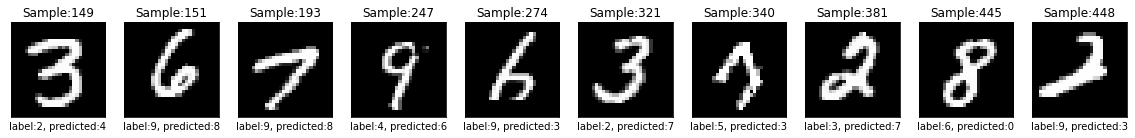

In [73]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Sample:" + str(missed[i][0]))
    plt.xlabel("label:" + str(missed[i][1]) + ", predicted:" + str(missed[i][2]))
    plt.imshow(x_train[missed[i][0]], cmap='gray')

plt.show()

-------
__Be joyful always!__ 1 Thes.5:16